In [ ]:
!pip3 install tensorflow-text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
!pip install numba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
!pip install tf-models-official

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
!pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
import pandas as pd
import nltk
import string
import re

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization

import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Note: make a table that says that the number of words after the removal of tade was this, after the removal of .... the number was this in a table

In [ ]:

with open('amazon_cells_labelled.txt', 'r') as file:
    lines = file.readlines()

reviews = pd.DataFrame(columns=['Text', 'Sentiment'])

for line in lines:
    comment, sentiment = line.strip().split('\t')
    reviews = pd.concat([reviews, pd.DataFrame({'Text': [comment], 'Sentiment': [sentiment]})], ignore_index=True)

reviews = reviews.astype({'Text':'string'})
print(reviews)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                                  Text Sentiment
0    So there is no way for me to plug it in here i...         0
1                          Good case, Excellent value.         1
2                               Great for the jawbone.         1
3    Tied to charger for conversations lasting more...         0
4                                    The mic is great.         1
..                                                 ...       ...
995  The screen does get smudged easily because it ...         0
996  What a piece of junk.. I lose more calls on th...         0
997                       Item Does Not Match Picture.         0
998  The only thing that disappoint me is the infra...         0
999  You can not answer calls with the unit, never ...         0

[1000 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])

[0 1 1 0 1 0 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [ ]:
text = reviews['Text']
text[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: Text, dtype: string

changes visualisation

In [ ]:
import matplotlib.pyplot as plt
# Step 1: Removing Punctuation
text_no_punct = [review.translate(str.maketrans('', '', string.punctuation)) for review in text[:5]]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i, sentence in enumerate(text[:5]):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.subplot(1, 2, 2)
for i, sentence in enumerate(text_no_punct):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig('punctuation_removal.png', dpi=300)
plt.close()

# Step 2: Removing Numbers
lines_to_show = [3, 76, 149, 84, 38]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i, line_number in enumerate(lines_to_show):
    plt.text(0.05, 1 - i * 0.2, text[line_number], wrap=True, fontsize=14)
plt.axis('off')
text_no_numbers = [review.translate(str.maketrans('', '', string.digits)) for review in text]
plt.subplot(1, 2, 2)
for i, line_number in enumerate(lines_to_show):
    plt.text(0.05, 1 - i * 0.2, text_no_numbers[line_number], wrap=True, fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig('number_removal.png', dpi=300)
plt.close()

# Step 3: Changing to Lowercase
text_lower = [review.lower() for review in text[:5]]
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i, sentence in enumerate(text[:5]):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.subplot(1, 2, 2)
for i, sentence in enumerate(text_lower):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig('lowercasing.png', dpi=300)
plt.close()

# Step 4: Remove Stopwords
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i, sentence in enumerate(text[:5]):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.subplot(1, 2, 2)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text_no_stopwords = [' '.join(term for term in review.split() if term.lower() not in stop_words) for review in text[:5]]
for i, sentence in enumerate(text_no_stopwords):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig('stopwords_removal.png', dpi=300)
plt.close()

# Step 5: Lemmatization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
for i, sentence in enumerate(text[:5]):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.subplot(1, 2, 2)
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()
text_lemmatized = [' '.join(lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in review.split()) for review in text_lower]
for i, sentence in enumerate(text_lemmatized):
    plt.text(0.05, 1 - i * 0.2, sentence, wrap=True, fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig('lemmatization.png', dpi=300)
plt.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


actual changes

In [ ]:
text1 = []

for review in text:
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    text1.append(review)


text1[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than  minutesmajor problems',
 'the mic is great']

In [ ]:
text1 = pd.Series(text1)
text1[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    so there is no way for me to plug it in here i...
1                            good case excellent value
2                                great for the jawbone
3    tied to charger for conversations lasting more...
4                                     the mic is great
dtype: object

In [ ]:
#remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

text1 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text1[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                      way plug us unless go converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
dtype: object

In [ ]:
#apply lemmatising with POS tags
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
text1 = text1.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text1[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                       way plug u unless go converter
1                            good case excellent value
2                                        great jawbone
3    tie charger conversation last minutesmajor pro...
4                                            mic great
dtype: object

In [ ]:
reviews1 = list(zip(text1, label))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews1[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('way plug u unless go converter', 0),
 ('good case excellent value', 1),
 ('great jawbone', 1),
 ('tie charger conversation last minutesmajor problem', 0),
 ('mic great', 1)]

In [ ]:
reviewsP = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviewsP

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Review,Sentiment
0,way plug u unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [ ]:
# Shuffeling the reviews on order to prevent any ordering having an influence on the performance
reviewsP1 = reviewsP.sample(frac=1, random_state=1).reset_index()
reviewsP1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,index,Review,Sentiment
0,507,holster arrive match photo ad,0
1,818,doesnt job,0
2,452,colleague get great receptiona little expensiv...,1
3,368,love phone,1
4,242,bad customer service ever,0


In [ ]:
reviewsP1.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



index         int64
Review       object
Sentiment     int64
dtype: object

In [ ]:
#split the dataset

#train dataset by splitting the data
train_reviews = reviewsP1.Review[:800]
train_sentiments = reviewsP1.Sentiment[:800]

#test dataset
test_reviews = reviewsP1.Review[800:]
test_sentiments = reviewsP1.Sentiment[800:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(800,) (800,)
(200,) (200,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer()

#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (800, 1318)
BOW_cv_test: (200, 1318)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
models = []
Accuracy_score = []
precision = []
recall = []
f1Score = []
aucScore = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Decision Tree Model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages

              precision    recall  f1-score   support

    Positive       0.76      0.85      0.80       104
    Negative       0.81      0.71      0.76        96

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



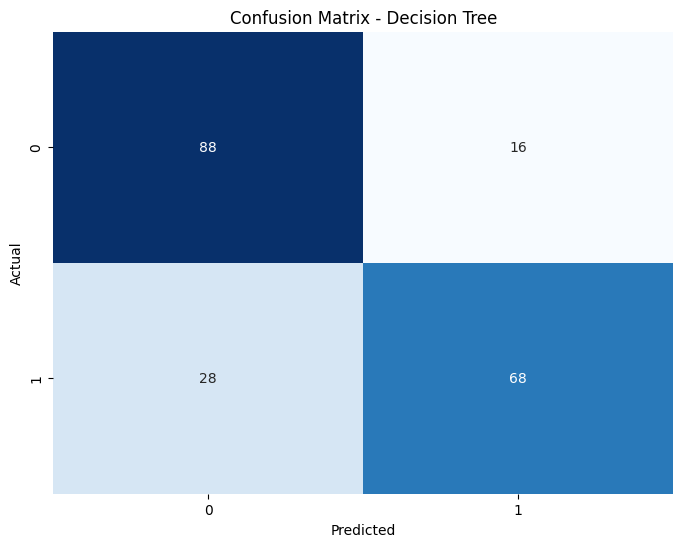

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

roc_auc_score for DT: 0.7772435897435899


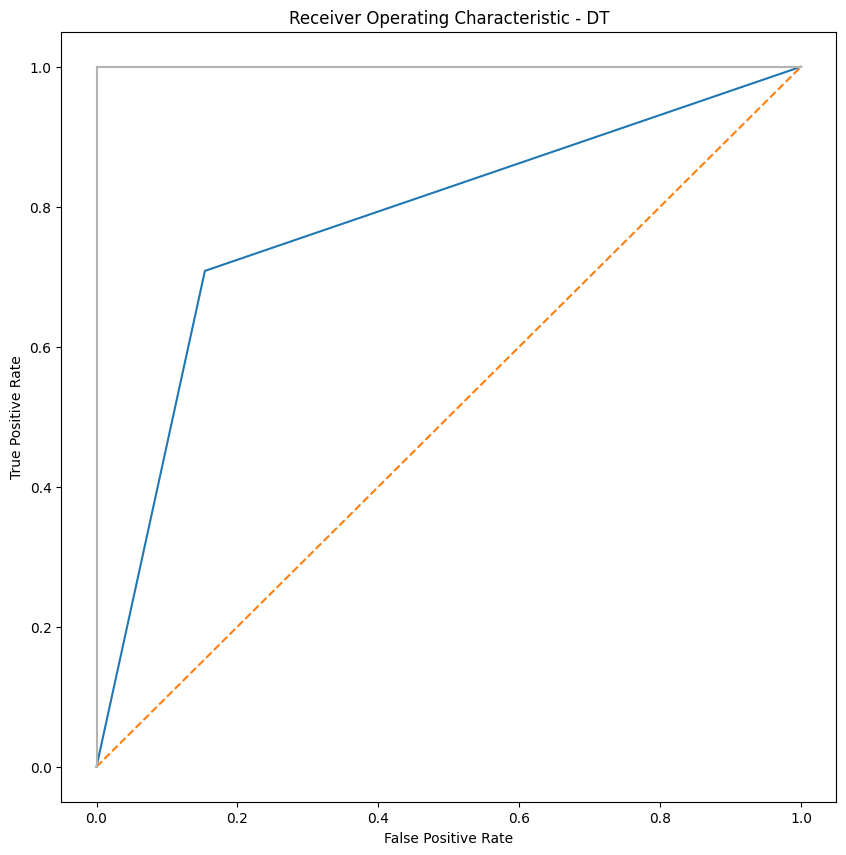

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree Classifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fitting the model for Bag of words
DT_bow = DT.fit(cv_train_reviews, train_sentiments)

# Predicting the model for bag of words
DT_bow_predict = DT.predict(cv_test_reviews)

# Classification report for bag of words
DT_bow_report = classification_report(test_sentiments, DT_bow_predict, target_names=['Positive', 'Negative'])
print(DT_bow_report)

# Plotting the Confusion Matrix
cm = confusion_matrix(test_sentiments, DT_bow_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('DecisionTreeConfusionMatrix.png', dpi=300)
plt.show()

# AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_bow_predict)
print('roc_auc_score for DT:', roc_auc_score(test_sentiments, DT_bow_predict))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('DecisionTreeROC.png', dpi=300)
plt.show()
Accuracy_score.append(accuracy_score(test_sentiments,DT_bow_predict))
models.append('Decision Tree')
precision.append(precision_score(test_sentiments,DT_bow_predict))
recall.append(recall_score(test_sentiments,DT_bow_predict))
f1Score.append(f1_score(test_sentiments,DT_bow_predict))
aucScore.append(roc_auc_score(test_sentiments, DT_bow_predict))

Naive Bayes Model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages

              precision    recall  f1-score   support

    Positive       0.84      0.75      0.79       104
    Negative       0.76      0.84      0.80        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



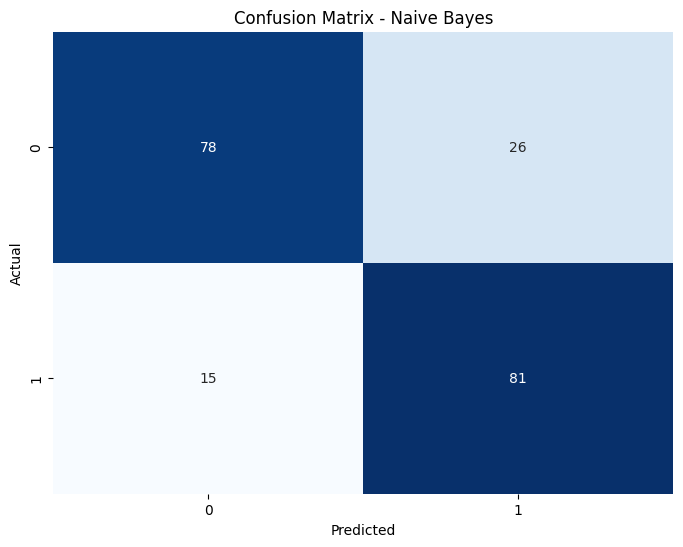

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

roc_auc_score for NB:  0.796875


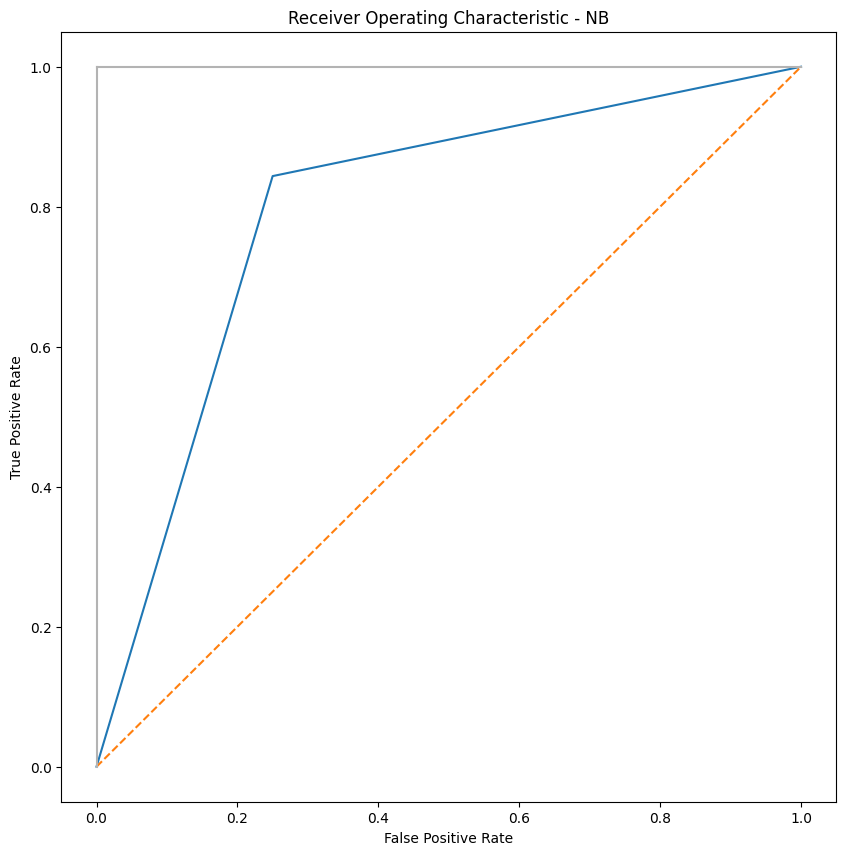

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

In [ ]:
NB = MultinomialNB()

#Fitting the model for Bag of words
NB_bow = NB.fit(cv_train_reviews,train_sentiments)

#Predicting the model for bag of words
NB_bow_predict = NB.predict(cv_test_reviews)

#Classification report for bag of words
NB_bow_report=classification_report(test_sentiments,NB_bow_predict,target_names=['Positive','Negative'])
print(NB_bow_report)

# Plotting the Confusion Matrix
cm = confusion_matrix(test_sentiments, NB_bow_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('NaiveBayesConfusionMatrix.png', dpi=300)
plt.show()

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, NB_bow_predict)
print('roc_auc_score for NB: ', roc_auc_score(test_sentiments, NB_bow_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - NB')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('NaiveBayesROC.png', dpi=300)
plt.show()

Accuracy_score.append(accuracy_score(test_sentiments,NB_bow_predict))
models.append('Naive Bayes')
precision.append(precision_score(test_sentiments,NB_bow_predict))
recall.append(recall_score(test_sentiments,NB_bow_predict))
f1Score.append(f1_score(test_sentiments,NB_bow_predict))
aucScore.append(roc_auc_score(test_sentiments, NB_bow_predict))

SVM Model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages

              precision    recall  f1-score   support

    Positive       0.81      0.84      0.82       104
    Negative       0.82      0.78      0.80        96

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



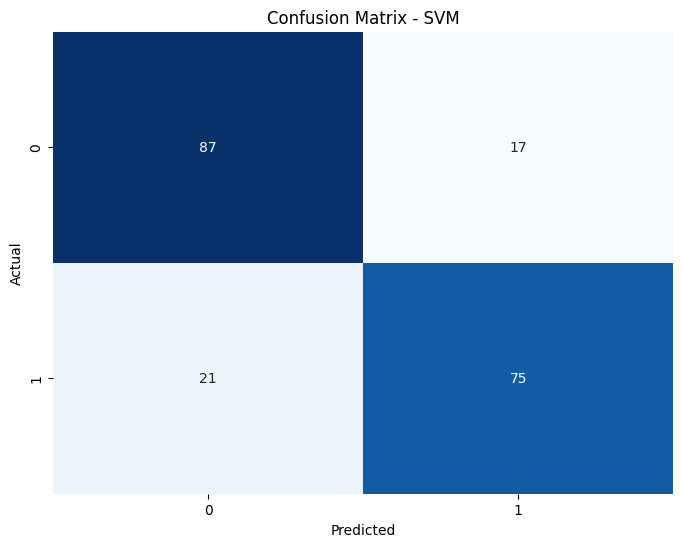

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

roc_auc_score for SVM:  0.8088942307692307


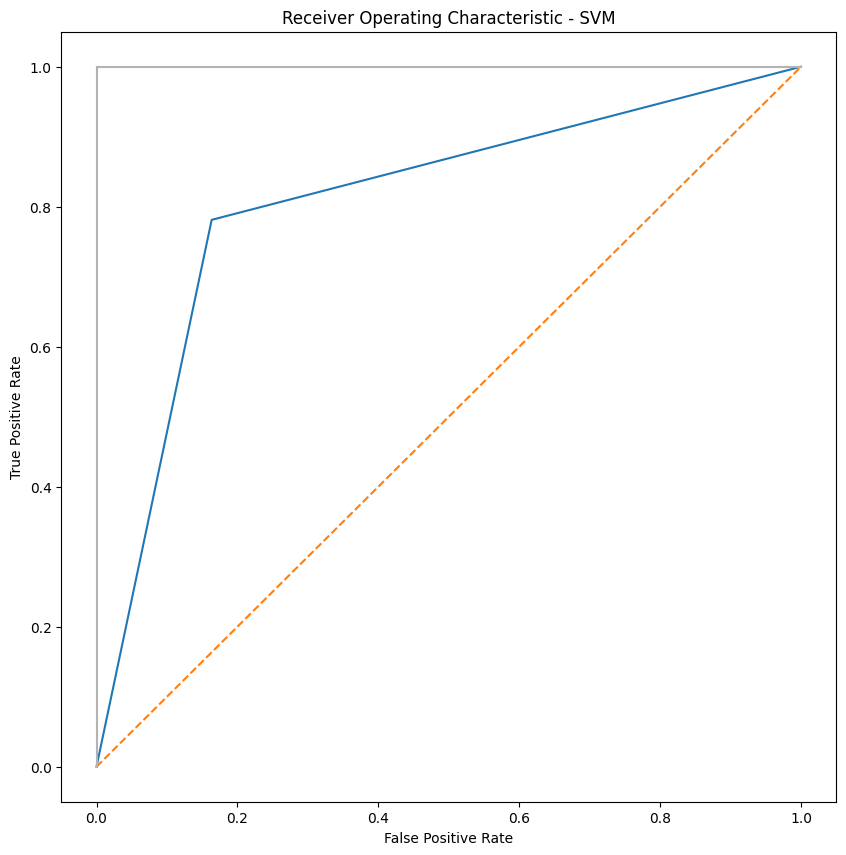

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

In [ ]:
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500)

#Fitting the model for Bag of words
SVM_bow = SVM.fit(cv_train_reviews,train_sentiments)

#Predicting the model for bag of words
SVM_bow_predict = SVM.predict(cv_test_reviews)

#Classification report for bag of words
SVM_bow_report=classification_report(test_sentiments,SVM_bow_predict,target_names=['Positive','Negative'])
print(SVM_bow_report)

# Plotting the Confusion Matrix
cm = confusion_matrix(test_sentiments, SVM_bow_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('SVMConfusionMatrix.png', dpi=300)
plt.show()

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, SVM_bow_predict)
print('roc_auc_score for SVM: ', roc_auc_score(test_sentiments, SVM_bow_predict))

import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('SVMROC.png', dpi=300)
plt.show()
Accuracy_score.append(accuracy_score(test_sentiments,SVM_bow_predict))
models.append('SVM')
precision.append(precision_score(test_sentiments,SVM_bow_predict))
recall.append(recall_score(test_sentiments,SVM_bow_predict))
f1Score.append(f1_score(test_sentiments,SVM_bow_predict))
aucScore.append(roc_auc_score(test_sentiments, SVM_bow_predict))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages

              precision    recall  f1-score   support

    Positive       0.79      0.85      0.81       104
    Negative       0.82      0.75      0.78        96

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



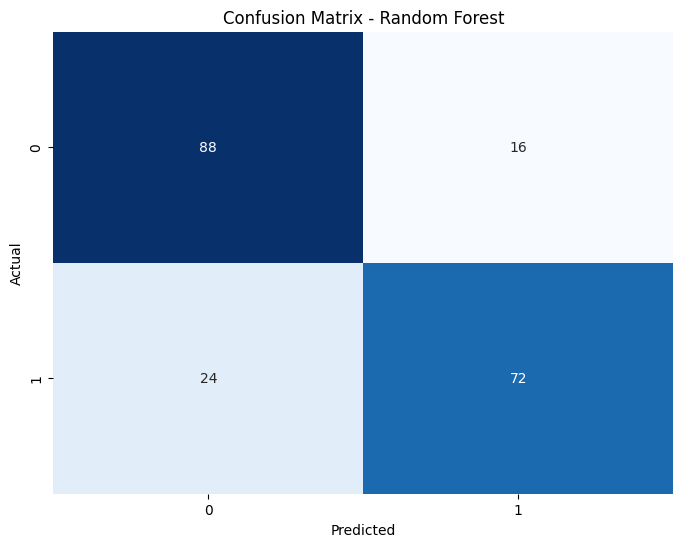

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

roc_auc_score for RF: 0.7980769230769231


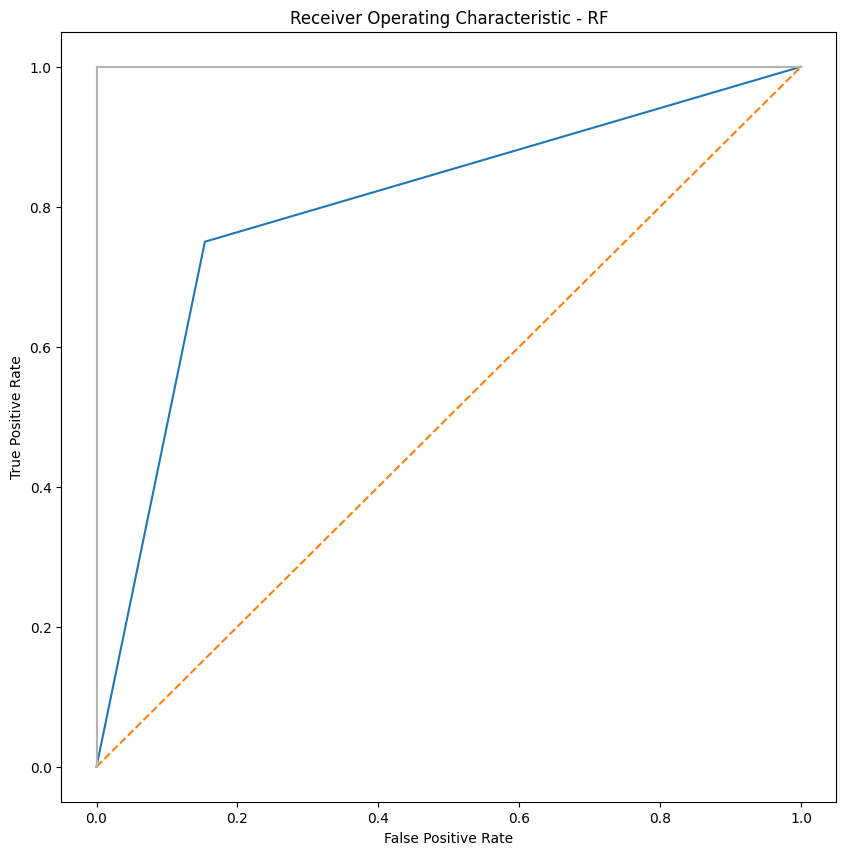

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future versio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# Fitting the model for Bag of words
RF_bow = RF.fit(cv_train_reviews, train_sentiments)

# Predicting the model for bag of words
RF_bow_predict = RF.predict(cv_test_reviews)

# Classification report for bag of words
RF_bow_report = classification_report(test_sentiments, RF_bow_predict, target_names=['Positive', 'Negative'])
print(RF_bow_report)

# Plotting the Confusion Matrix
cm = confusion_matrix(test_sentiments, RF_bow_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('RandomForestConfusionMatrix.png', dpi=300)
plt.show()

# AUC score and ROC curve
FP, TP, threshold1 = roc_curve(test_sentiments, RF_bow_predict)
print('roc_auc_score for RF:', roc_auc_score(test_sentiments, RF_bow_predict))

plt.subplots(1, figsize=(10, 10))
plt.title('Receiver Operating Characteristic - RF')
plt.plot(FP, TP)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('RandomForestROC.png', dpi=300)
plt.show()

Accuracy_score.append(accuracy_score(test_sentiments, RF_bow_predict))
models.append('Random Forest')
precision.append(precision_score(test_sentiments, RF_bow_predict))
recall.append(recall_score(test_sentiments, RF_bow_predict))
f1Score.append(f1_score(test_sentiments, RF_bow_predict))
aucScore.append(roc_auc_score(test_sentiments, RF_bow_predict))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



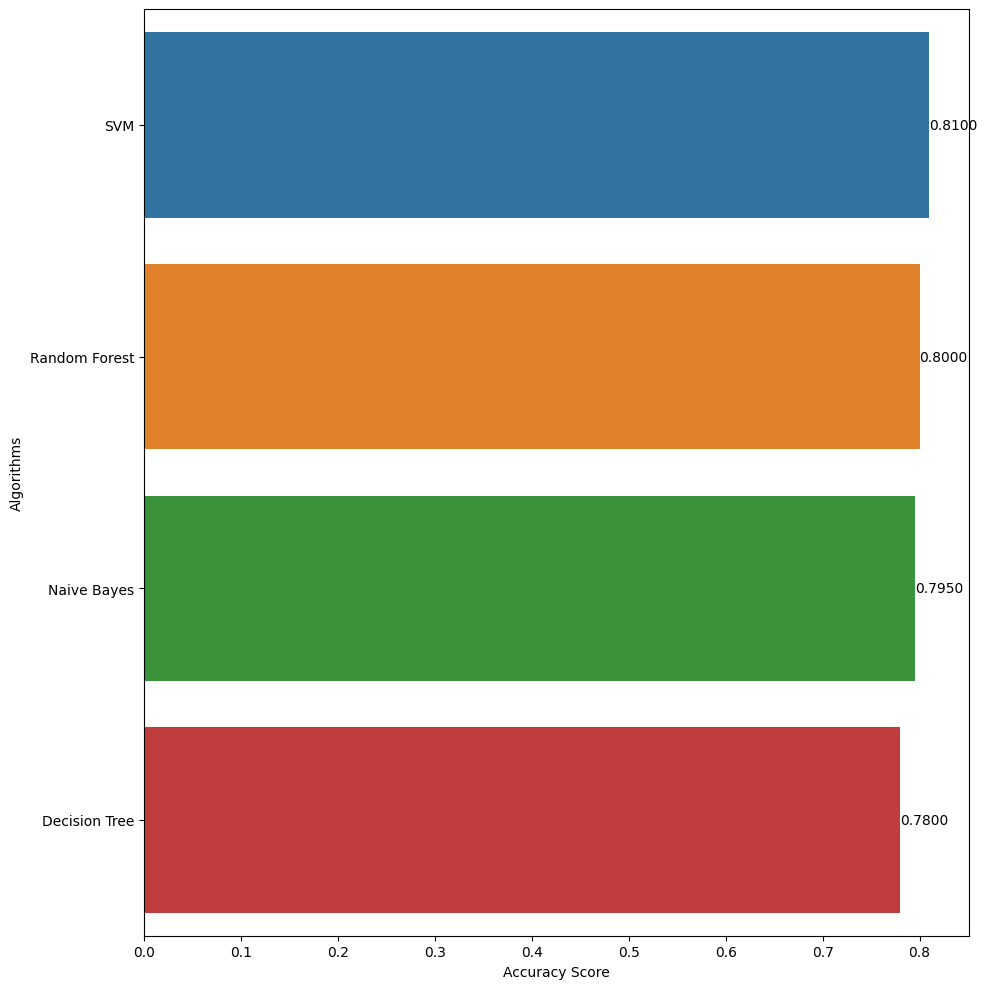

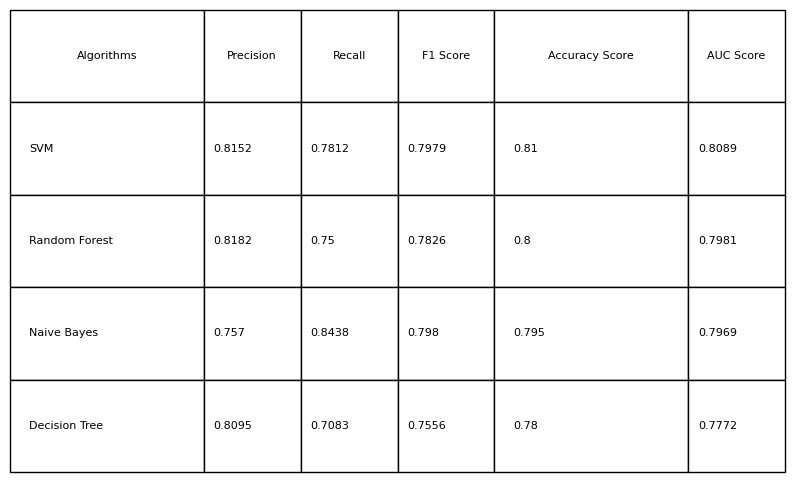

In [ ]:
compare_models = pd.DataFrame({'Algorithms': models, 'Precision': precision, 'Recall': recall, 'F1 Score': f1Score, 'Accuracy Score': Accuracy_score, 'AUC Score': aucScore})
compare_models = compare_models.round(4)
compare_models = compare_models.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 10))
barplot = sns.barplot(x='Accuracy Score', y='Algorithms', data=compare_models)

for index, value in enumerate(compare_models['Accuracy Score']):
    barplot.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('accuracy_comparison_plot.png', dpi=400)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

col_widths = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1]

table = ax.table(cellText=compare_models.values, colLabels=compare_models.columns, cellLoc='left', loc='left', bbox=[0, 0, 1, 1], colWidths=col_widths)

plt.savefig('model_comparison_table.png', dpi=400)
plt.show()

Part 3: Bert Classification

In [ ]:
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Text,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
reviews.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(1000, 2)

In [ ]:
reviews['Sentiment'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Sentiment
0    500
1    500
Name: count, dtype: int64

In [ ]:
#save the labels and encode them as 1 and 0 for future classification/clustering
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['Sentiment'])
print(label[:10])
print(reviews['Sentiment'][:10])

[0 1 1 0 1 0 0 1 0 0]
0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: Sentiment, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [ ]:
reviews1 = list(zip(reviews['Text'], label))

reviews1 = pd.DataFrame (reviews1, columns = ['Review', 'Sentiment'])
reviews1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [ ]:
reviews1 = reviews1.sample(frac=1, random_state=1)
reviews1.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Review,Sentiment
0,The holster that arrived did not match the pho...,0
1,Doesn't do the job.,0
2,My colleague & I now get great reception.A lit...,1
3,Love This Phone.,1
4,Worst Customer Service Ever.,0


In [ ]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews1['Review'], reviews1['Sentiment'],
                                                     stratify=reviews1['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [ ]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [ ]:
X_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



862                                    Great bluetooth!.
321    There's a horrible tick sound in the backgroun...
135                           Last time buying from you.
645    The real killer is the volume, and of course i...
980         I wasted my little money with this earpiece.
                             ...                        
750                                      Piece of trash.
63     We have tried 2 units and they both failed wit...
311    I even dropped this phone into a stream and it...
689               I cannot make calls at certain places.
828    I connected my wife's bluetooth,(Motorola HS85...
Name: Review, Length: 600, dtype: object

In [ ]:
X_val

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



116    It lasts less than 3o minutes, if I actually t...
486                                         Great Value.
278    They do not last forever, but is not overly ex...
170    It makes very strange ticking noises before it...
663                      I great reception all the time.
                             ...                        
381    But it does get better reception and clarity t...
330    Verizon's bills, however, are difficult to und...
72               the phone was unusable and was not new.
723    I like the fact that it rests lightly against ...
781    I have purchased these for both family and fri...
Name: Review, Length: 200, dtype: object

In [ ]:
X_test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



3                                       Love This Phone.
81     It dit not work most of the time with my Nokia...
307                         Buyer--Be Very Careful!!!!!.
30                                   Good show, Samsung.
625    These products cover up the important light se...
                             ...                        
461            Reception is terrible and full of static.
730    I would recommend purchasing the Jabra JX-10 s...
407    He was very impressed when going from the orig...
491    Their network coverage in Los Angeles is horri...
840    It was an inexpensive piece, but I would still...
Name: Review, Length: 200, dtype: object

In [ ]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews1['Review'][0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'The holster that arrived did not match the photo in the ad.'

In [ ]:
text_test = ["This was a superb episode, one of the best of both seasons. Down right horror for a change, with a story that is way way above the average MOH episodes, if there is such a thing. A man's wife is almost burned to death in a tragic car wreck, in which he was driving. His airbag worked, her's didn't. She is burned beyond recognition (great makeup btw), and not given much of a chance to live without a full skin graft. BUT, even in a coma, she keeps dying but brought back by modern technology, and when she does die for a few minutes, her ghost appears as a very vengeful spirit. Carnage of course ensues, and also some extremely gory killings, and also, some extremely sexy scenes. What more could you ask for, you might ask? Well, not much, because this baby has it all, and a very satirical ending, that should leave a smile on most viewers faces. I just loved Rob Schmidt's (Wrong Turn) direction too, he has a great knack for horror. Excellent episode, this is one I'm buying for sure.This was a superb episode, one of the best of both seasons."]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  2023  2001  1037 21688  2792  1010  2028  1997  1996  2190  1997]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.6901299   0.99756277 -0.3208749   0.03474531  0.6150474  -0.91803926
  0.9794196  -0.854188   -0.5536     -0.99389905 -0.14277233 -0.9524568 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.01881617 -0.19083801  0.3050598  ... -0.81572354 -0.2143654
   0.4443283 ]
 [-0.51914114  0.05107703 -0.3387493  ...  1.2194269  -0.7392854
   0.8853782 ]
 [-0.45957828  0.15729094 -0.89442855 ...  0.89337873 -0.33719978
   0.58194757]
 ...
 [-0.5031906   0.23234262 -2.4240851  ... -1.0548139   0.775113
  -0.36098665]
 [-1.4614178   0.20342398 -0.8485448  ... -0.09167142 -0.07505965
  -0.01238689]
 [-1.6349399   0.33674505 -1.0467939  ...  0.22726572 -0.938206
  -0.24242482]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
classifier_model = build_classifier_model()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



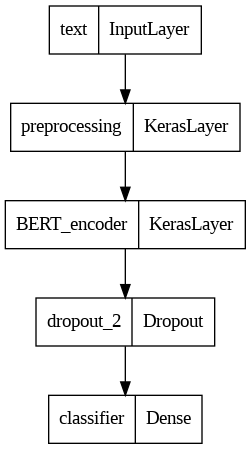

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
epochs = 30
steps_per_epoch = 1200  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



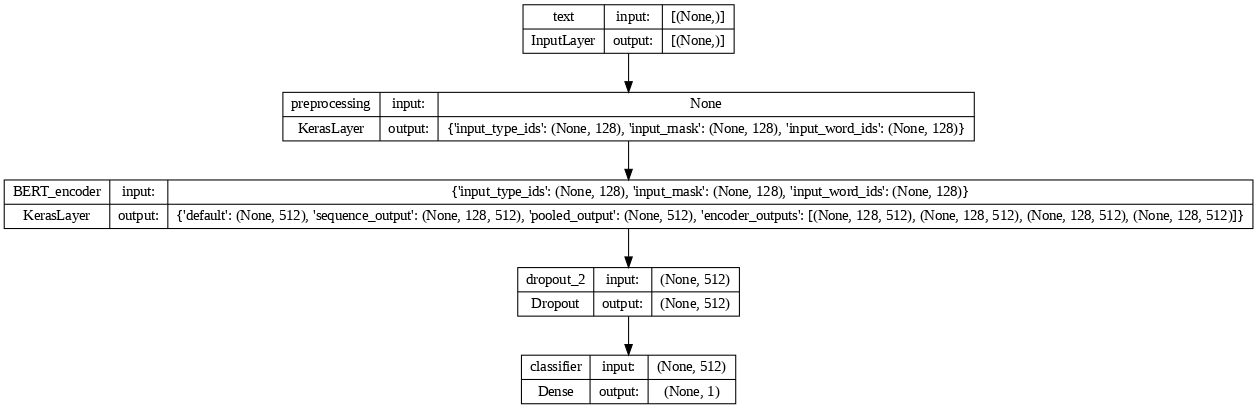

In [ ]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/30
19/19 [==============================] - 11s 261ms/step - loss: 0.9204 - binary_accuracy: 0.4967 - val_loss: 0.8863 - val_binary_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 6s 297ms/step - loss: 0.9097 - binary_accuracy: 0.4917 - val_loss: 0.8628 - val_binary_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 4s 238ms/step - loss: 0.8939 - binary_accuracy: 0.4900 - val_loss: 0.8275 - val_binary_accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 5s 241ms/step - loss: 0.8510 - binary_accuracy: 0.4933 - val_loss: 0.7865 - val_binary_accuracy: 0.5000
Epoch 5/30
19/19 [==============================] - 5s 275ms/step - loss: 0.8083 - binary_accuracy: 0.5017 - val_loss: 0.7452 - val_binary_accuracy: 0.5350
Epoch 6/30
19/19 [==============================] - 4s 237ms/step - loss: 0.7637 - binary_accuracy: 0.4967 - val_loss: 0.7130 -

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



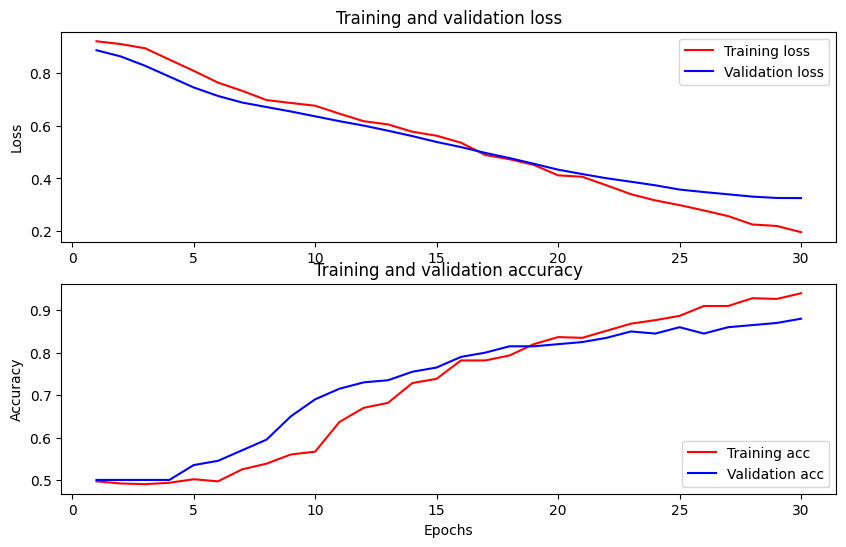

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('Training_and_loss.png', dpi=300)

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/7 [===>..........................] - ETA: 0s - loss: 0.2357 - binary_accuracy: 0.9062

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



7/7 [==============================] - 1s 86ms/step - loss: 0.3493 - binary_accuracy: 0.8300
Loss: 0.34929072856903076
Accuracy: 0.8299999833106995


In [ ]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predicted values using the model
y_pred=classifier_model.predict(X_test)

print(y_pred.flatten())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



7/7 [==============================] - 1s 82ms/step
[0.9622239  0.03952158 0.76338756 0.9874143  0.7782274  0.570209
 0.928857   0.02421737 0.97018504 0.0369943  0.99532604 0.9922956
 0.95814013 0.08122557 0.95533246 0.02795636 0.9879859  0.10146037
 0.9809731  0.10392503 0.20128028 0.16824028 0.0237593  0.9362944
 0.27463582 0.02918496 0.11625247 0.02664892 0.9885626  0.16047777
 0.0767852  0.325231   0.03171402 0.10937234 0.9734884  0.9553383
 0.04147824 0.97644967 0.75179577 0.82916456 0.05369478 0.09051783
 0.7695009  0.4445299  0.19787188 0.6891482  0.11136596 0.9822213
 0.9442795  0.82205456 0.24439032 0.06633992 0.03966785 0.9898722
 0.43021855 0.19760689 0.9683367  0.03642    0.05313377 0.536965
 0.98603594 0.37027532 0.95166856 0.9409072  0.14644468 0.9932957
 0.04468508 0.94677603 0.99052256 0.9615359  0.01959923 0.04392214
 0.8422869  0.9352785  0.9916539  0.92212874 0.18519428 0.13263509
 0.9544234  0.91773397 0.30331478 0.4804766  0.09142024 0.9914961
 0.9913283  0.2721424

In [ ]:
#len(y_pred)

for i in range(len(y_pred)):
  if y_pred[i]<0.5:
    y_pred[i] = 0
  else: y_pred[i] = 1

print(y_pred.flatten())

[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 1.]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

print(confusion_matrix(y_test, y_pred), '\n')

bert_precision = precision_score(y_test, y_pred)
bert_recall = recall_score(y_test, y_pred)
bert_f1Score = f1_score(y_test, y_pred)
bert_accuracy_score = accuracy_score(y_test, y_pred)
bert_auc_score = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))

[[84 16]
 [18 82]] 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.84      0.82      0.83       100

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Accuracy: 0.83
AUC: 0.8299999999999998


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: DeprecationWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/usr/local/lib/python3.10/dist-packages

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



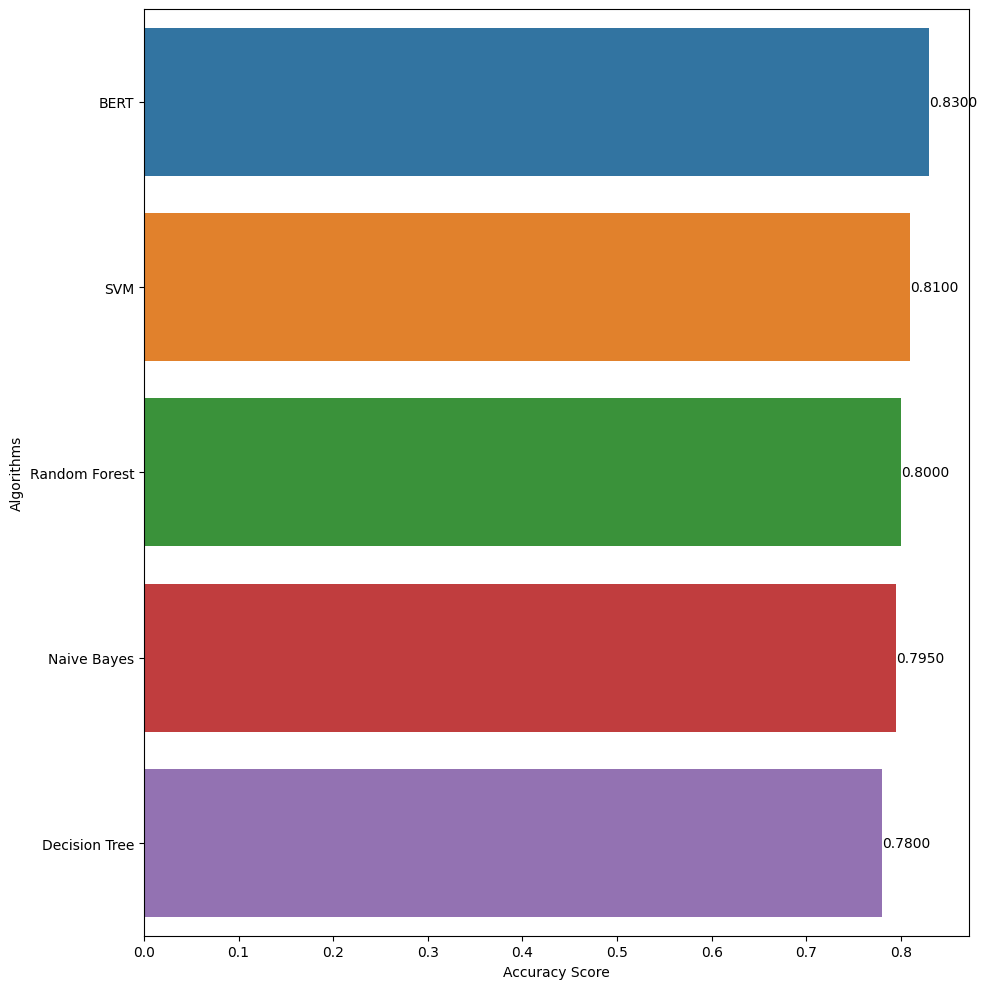

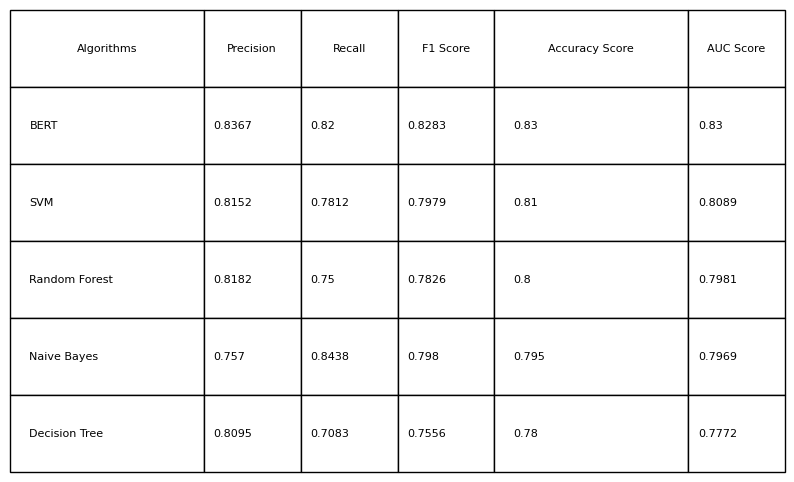

In [ ]:
# Add BERT metrics to the comparison DataFrame
compare_models = pd.DataFrame({'Algorithms': models + ['BERT'],
                               'Precision': precision + [bert_precision],
                               'Recall': recall + [bert_recall],
                               'F1 Score': f1Score + [bert_f1Score],
                               'Accuracy Score': Accuracy_score + [bert_accuracy_score],
                               'AUC Score': aucScore + [bert_auc_score]})
compare_models = compare_models.round(4)
compare_models = compare_models.sort_values(by='Accuracy Score', ascending=False).reset_index(drop=True)

# Plot the comparison
plt.figure(figsize=(10, 10))
barplot = sns.barplot(x='Accuracy Score', y='Algorithms', data=compare_models)

for index, value in enumerate(compare_models['Accuracy Score']):
    barplot.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.savefig('accuracy_comparison_plot_bert.png', dpi=400)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')

col_widths = [0.2, 0.1, 0.1, 0.1, 0.2, 0.1]

table = ax.table(cellText=compare_models.values, colLabels=compare_models.columns, cellLoc='left', loc='left', bbox=[0, 0, 1, 1], colWidths=col_widths)

plt.savefig('model_comparison_table_bert.png', dpi=400)
plt.show()

**Topic detection**

In [ ]:
import numpy as np
import pandas as pd

import nltk
import string

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.utils import simple_preprocess

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
data = reviewsP.Review.values.tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

words = list(sent_to_words(data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(words)

# Create Corpus
texts = words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.034*"phone" + 0.033*"work" + 0.029*"great" + 0.023*"product" + '
  '0.013*"make" + 0.010*"get" + 0.009*"headset" + 0.009*"go" + 0.008*"dont" + '
  '0.008*"problem"'),
 (1,
  '0.036*"phone" + 0.019*"use" + 0.014*"great" + 0.014*"headset" + '
  '0.014*"good" + 0.012*"one" + 0.011*"sound" + 0.011*"best" + 0.011*"ear" + '
  '0.010*"service"'),
 (2,
  '0.018*"would" + 0.018*"phone" + 0.017*"recommend" + 0.014*"quality" + '
  '0.012*"good" + 0.011*"ear" + 0.010*"look" + 0.010*"excellent" + '
  '0.010*"headset" + 0.008*"product"'),
 (3,
  '0.019*"well" + 0.018*"phone" + 0.016*"good" + 0.015*"work" + 0.013*"use" + '
  '0.011*"one" + 0.010*"case" + 0.008*"battery" + 0.007*"design" + '
  '0.007*"try"'),
 (4,
  '0.018*"phone" + 0.017*"work" + 0.016*"get" + 0.014*"battery" + '
  '0.014*"great" + 0.012*"well" + 0.011*"quality" + 0.011*"case" + 0.010*"im" '
  '+ 0.010*"good"')]


In [ ]:
pip install pyLDAvis==3.4.1 --user

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

LDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.009677  0.002151       1        1  24.821223
1      0.027373 -0.109148       2        1  23.343795
4     -0.040593  0.043009       3        1  19.686645
3     -0.077737  0.009446       4        1  17.700517
2      0.100633  0.054542       5        1  14.447819, topic_info=          Term       Freq      Total Category  logprob  loglift
78       would  27.000000  27.000000  Default  30.0000  30.0000
65   recommend  21.000000  21.000000  Default  29.0000  29.0000
130    product  44.000000  44.000000  Default  28.0000  28.0000
384    service  18.000000  18.000000  Default  27.0000  27.0000
147       well  44.000000  44.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
41       sound   5.321614  36.137876   Topic5  -4.9619   0.0191
39        time   3.944418  24.935735   Topic5  -5.2613   0.0906
9        great   4.772818  77.856504   Topic5  -5.0707  -0.8573
71        work   4.796856  88.216257   Topic5  -5.0657  -0.9772
147       well   3.967111  44.803476   Topic5  -5.2556  -0.4896

[360 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
964       2  0.838467  accidentally
1033      1  0.851521       adapter
67        5  0.871079        advise
691       3  0.852686         allow
750       5  0.871142         along
...     ...       ...           ...
923       4  0.872597         wrong
141       1  0.450471          year
141       2  0.150157          year
141       3  0.300314          year
141       5  0.150157          year

[640 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 5, 4, 3])

Bert prediction as extra model

In [ ]:
!pip install bertopic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Text,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
# Create a new column containing the length each review
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print("The longest review has: {} words".format(reviews.Text_len.max()))

The longest review has: 30 words


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



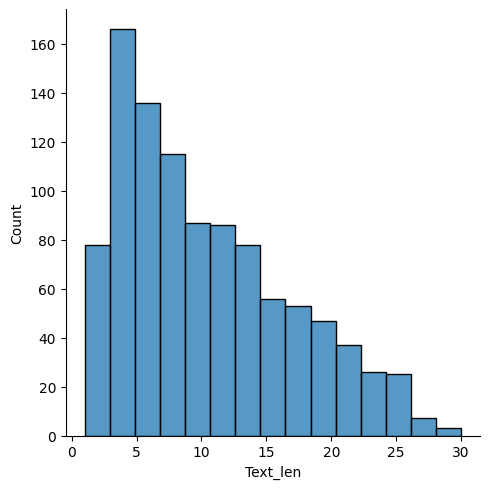

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [ ]:
text = reviews['Text']

text1 = []

for review in text:
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    text1.append(review)


text1[:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value']

In [ ]:
text1 = pd.Series(text1)
text1[:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0    so there is no way for me to plug it in here i...
1                            good case excellent value
dtype: object

In [ ]:
#remove stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['film','movie', 'get', 'see', 'make', 'one']
stopwords.extend(newStopWords)

#Setting English stopwords
stop_words = set(stopwords)

#text = reviews['Text']
text2 = text1.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
text2[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                      way plug us unless go converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
dtype: object

In [ ]:
#apply lemmatising with POS tags

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text2.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    way plug u unless go converter
1         good case excellent value
dtype: object

In [ ]:
reviews['Text'] = text3
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Text,Sentiment,Text_len
0,way plug u unless go converter,0,21
1,good case excellent value,1,4
2,great jawbone,1,4
3,tie charger conversation last minutesmajor pro...,0,11
4,mic great,1,4


In [ ]:
# Create a new column containing the length each review after preprocessing
reviews["Text_len"] = reviews["Text"].apply(lambda x : len(x.split()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



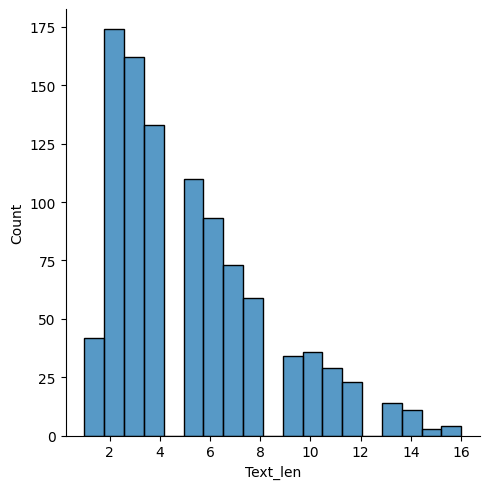

In [ ]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(reviews.Text_len, kde=False)

In [ ]:
reviews.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Text,Sentiment,Text_len
0,way plug u unless go converter,0,6
1,good case excellent value,1,4
2,great jawbone,1,2
3,tie charger conversation last minutesmajor pro...,0,6
4,mic great,1,2


In [ ]:
from bertopic import BERTopic

#default uses HDBSCAN
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
review_topics, probs = model.fit_transform(reviews.Text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2024-01-06 16:15:45,518 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-01-06 16:15:46,020 - BERTopic - Embedding - Completed ✓
2024-01-06 16:15:46,022 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-01-06 16:15:52,573 - BERTopic - Dimensionality - Completed ✓
2024-01-06 16:15:52,575 - BERTopic - Cluster - Start clustering the reduced embeddings
/usr/local/lib/python3.10/dist-packages/hdbscan/hdbscan_.py:1170: DeprecationWarning:

`alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.

2024-01-06 16:15:52,609 - BERTopic - Cluster - Completed ✓
2024-01-06 16:15:52,613 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-01-06 16:15:52,650 - BERTopic - Representation - Completed ✓


In [ ]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name,Representation,Representative_Docs
0,-1,245,-1_would_recommend_use_easy,"[would, recommend, use, easy, work, product, g...","[would recommend, would recommend, great would..."
1,0,173,0_phone_great_love_ive,"[phone, great, love, ive, drop, work, several,...","[great phone, great phone, great phone]"
2,1,88,1_case_fit_horrible_nice,"[case, fit, horrible, nice, customer, comforta...","[nice case feel good hand, nice design quality..."
3,2,79,2_sound_quality_volume_voice,"[sound, quality, volume, voice, audio, poor, l...","[excellent sound quality, poor sound quality, ..."
4,3,54,3_work_great_far_doesnt,"[work, great, far, doesnt, good, fine, deal, c...","[work, work, work]"


In [ ]:
freq.head(9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Topic,Count,Name,Representation,Representative_Docs
0,-1,245,-1_would_recommend_use_easy,"[would, recommend, use, easy, work, product, g...","[would recommend, would recommend, great would..."
1,0,173,0_phone_great_love_ive,"[phone, great, love, ive, drop, work, several,...","[great phone, great phone, great phone]"
2,1,88,1_case_fit_horrible_nice,"[case, fit, horrible, nice, customer, comforta...","[nice case feel good hand, nice design quality..."
3,2,79,2_sound_quality_volume_voice,"[sound, quality, volume, voice, audio, poor, l...","[excellent sound quality, poor sound quality, ..."
4,3,54,3_work_great_far_doesnt,"[work, great, far, doesnt, good, fine, deal, c...","[work, work, work]"
5,4,52,4_headset_bluetooth_best_use,"[headset, bluetooth, best, use, love, bt, exce...",[love headset jabra bluetooth headset great re...
6,5,48,5_disappointed_disappointment_would_order,"[disappointed, disappointment, would, order, e...","[disappointed, disappointed, disappointed]"
7,6,47,6_product_purchase_seller_buying,"[product, purchase, seller, buying, good, buye...","[excellent product satisfied purchase, great p..."
8,7,46,7_battery_life_original_long,"[battery, life, original, long, last, die, ext...","[battery life also great, battery work great, ..."


In [ ]:
a_topic = freq.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores; the c-TF-IDF score is TF-IDF of the term in the cluster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[('phone', 0.1433135524113963),
 ('great', 0.04082642366119054),
 ('love', 0.0384298022661137),
 ('ive', 0.035937586974399686),
 ('drop', 0.028246361894265153),
 ('work', 0.023994747704877754),
 ('several', 0.023131537940383157),
 ('nokia', 0.023131537940383157),
 ('cell', 0.022418855474668545),
 ('verizon', 0.02237206569017264)]

In [ ]:
model.visualize_barchart(n_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

